In [133]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# **LOAD DATA** #

In [134]:
sales_df = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\CODSOFT\\Task4\\advertising.csv")
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [135]:
#check number of rows and columns 
print("Number of Rows:",sales_df.shape[0])
print("Number of Columns:",sales_df.shape[1])

Number of Rows: 200
Number of Columns: 4


In [136]:
#checking datastypes and info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [137]:
# describe data statistics 
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# **Processing** #

In [138]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

assigning the advertising values to x 

In [139]:
x = sales_df[['TV','Radio','Newspaper']]

In [140]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [141]:
y = sales_df['Sales']

In [142]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

### **Train Test Split** ###

In [143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [144]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

# **Linear Regression** #

In [145]:
lr = LinearRegression()
lr.fit(x_train_ss, y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(x_test_ss)

### **Performance Check** ###

In [147]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The Mean squared error is {round(mse,2)}")
print(f"The Mean absolute error is {round(mae,2)}")
print(f"The R2 score is {round(r2,2)}")

The Mean squared error is 1.89
The Mean absolute error is 1.01
The R2 score is 0.93


# **Aalysing Data** #

Text(0, 0.5, 'y_pred')

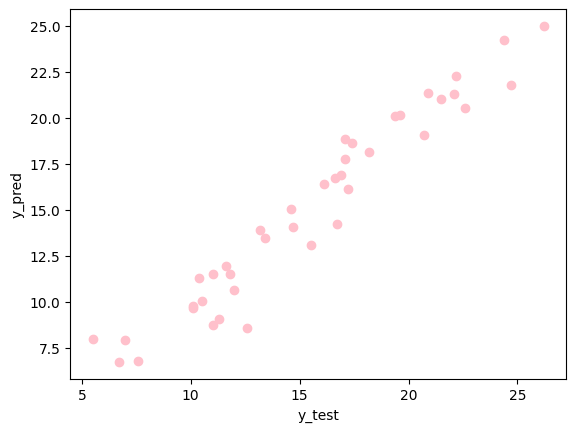

In [148]:
plt.scatter(y_test, y_pred, c='pink')
plt.xlabel("y_test")
plt.ylabel("y_pred")